<a href="https://colab.research.google.com/github/Holmes-Alan/Bayesian_Network/blob/main/Bayesian_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install cython
!pip install vose --no-build-isolation
!pip install sorobn
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.8/129.8 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (pyproject.toml) ... done
  Created wheel for vose: filename=vose-0.0.1-cp310-cp310-linux_x86_64.whl size=455661 sha256=36a9629dd1827efb38a32e604b9d6cd8a1c7b0de054dc950b950eccbf96a5ed6
  Stored in directory: /root/.cache/pip/wheels/7f/41/31/40f933f182decfa9300f85183d4043c5ed39fc941136e05ebc
Successfully built vose
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 17.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which

# Learn to plot Bayesian Network

In [2]:
import graphviz

dot = graphviz.Digraph(comment='alarm')
dot.node('A', 'Burglary')
dot.node('B', 'Earthquake')
dot.node('C', 'Alarm')
dot.node('D', 'John calls')
dot.node('E', 'Mary calls')

dot.edges(['AC', 'BC', 'CD', 'CE'])

In [3]:
print(dot.source)

// alarm
digraph {
	A [label=Burglary]
	B [label=Earthquake]
	C [label=Alarm]
	D [label="John calls"]
	E [label="Mary calls"]
	A -> C
	B -> C
	C -> D
	C -> E
}



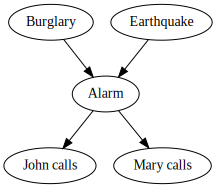

In [4]:
dot.render('round_table', directory='figures', format='svg', cleanup=True, view=True)
dot

# Question: convert the graph to Laplacian matrix

# Bayesian Network consutrction and inference

In [ ]:
!git clone https://github.com/Holmes-Alan/Bayesian_Network.git

Read "alarm.png" file from the github link, use sorobn to construct the bayesian network

In [5]:
import sorobn as hh
import pandas as pd

bn = hh.BayesNet(
    ('Burglary', 'Alarm'),
    ('Earthquake', 'Alarm'),
    ('Alarm', 'John calls'),
    ('Alarm', 'Mary calls'),
    seed=42
  )

# P(Burglary)
bn.P['Burglary'] = pd.Series({False: .999, True: .001})

# P(Earthquake)
bn.P['Earthquake'] = pd.Series({False: .998, True: .002})

# P(Alarm | Burglary, Earthquake)
bn.P['Alarm'] = pd.Series({
     (True, True, True): .95,
     (True, True, False): .05,

     (True, False, True): .94,
     (True, False, False): .06,

     (False, True, True): .29,
     (False, True, False): .71,

     (False, False, True): .001,
     (False, False, False): .999
 })

# P(John calls | Alarm)
bn.P['John calls'] = pd.Series({
     (True, True): .9,
     (True, False): .1,
     (False, True): .05,
     (False, False): .95
 })

# P(Mary calls | Alarm)
bn.P['Mary calls'] = pd.Series({
     (True, True): .7,
     (True, False): .3,
     (False, True): .01,
     (False, False): .99
 })

Bake the network

In [6]:
bn.prepare()

# Bayesian network inference

What is the likelihood of there being a burglary if both John and Mary call?

In [7]:
bn.query('Burglary', event={'Mary calls': True, 'John calls': True})

Burglary
False    0.715828
True     0.284172
Name: P(Burglary), dtype: float64

What are the chances that John and Mary call if an earthquake happens?

In [8]:
bn.query('John calls', 'Mary calls', event={'Earthquake': True})

John calls  Mary calls
False       False         0.675854
            True          0.027085
True        False         0.113591
            True          0.183470
Name: P(John calls, Mary calls), dtype: float64